In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_openai import ChatOpenAI

query = '넥슨에는 어떤 게임이 있나요?'

llm = ChatOpenAI(model='gpt-4o-mini')
llm.invoke(query)

AIMessage(content='넥슨은 다양한 인기 게임들을 개발하고 퍼블리싱하는 회사입니다. 여기 몇 가지 넥슨의 대표적인 게임들을 소개합니다:\n\n1. **메이플스토리** - 2D 사이드 스크롤 MMORPG로, 귀엽고 다양한 캐릭터와 직업, 풍부한 스토리와 다양한 퀘스트가 특징입니다.\n  \n2. **던전앤파이터 (DF)** - 2D 액션 RPG로, 빠른 전투와 다양한 캐릭터 클래스가 특징이며, PvE 및 PvP 콘텐츠가 풍부합니다.\n\n3. **바람의나라** - 클래식한 2D MMORPG로, 한국적인 배경과 다양한 캐릭터와 던전이 매력을 줍니다.\n\n4. **카운터-스트라이크 온라인** - 인기 FPS 게임인 카운터-스트라이크의 온라인 버전으로, 팀 기반 전투를 중심으로 진행됩니다.\n\n5. **FIFA 온라인 시리즈** - EA와 협력하여 개발된 축구 게임으로, 실제 축구 리그와 팀을 기반으로 한 콘텐츠가 제공됩니다.\n\n6. **서든어택** - 인기 FPS 게임 중 하나로, 빠른 템포의 전투와 다양한 맵, 게임 모드가 특징입니다.\n\n7. **블루 아카이브** - RPG와 전략 요소가 결합된 모바일 게임으로, 매력적인 캐릭터 디자인과 스토리가 특징입니다.\n\n이 외에도 넥슨은 다양한 장르의 게임을 운영하고 있으며, 지속적으로 새로운 콘텐츠와 게임을 출시하고 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 344, 'prompt_tokens': 17, 'total_tokens': 361, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 

In [3]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]

In [4]:
def generate(state: AgentState) -> AgentState:
    messages = state['messages']
    ai_message = llm.invoke(messages)
    return {'messages': [ai_message]}

In [5]:
from langgraph.graph import StateGraph, START, END
graph_builder = StateGraph(AgentState)
graph_builder.add_node("generate", generate)

In [6]:
graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

In [7]:
graph = graph_builder.compile()

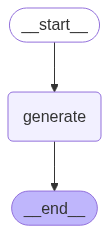

In [8]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
from langchain_core.messages import HumanMessage

initial_state = {'messages': [HumanMessage(query)]}

graph.invoke(initial_state)

{'messages': [AIMessage(content='넥슨은 다양한 게임을 개발하고 서비스하는 기업으로, 여러 인기 게임들을 보유하고 있습니다. 대표적인 게임들은 다음과 같습니다:\n\n1. **메이플스토리** - 2D 횡스크롤 MMORPG로, 오랫동안 많은 사랑을 받아왔습니다.\n2. **던전앤파이터 (DF)** - 액션성을 강조한 2D 사이드 스크롤 MMORPG입니다.\n3. **카트라이더** - 캐주얼 레이싱 게임으로, 다양한 캐릭터와 카트를 선택하여 경쟁할 수 있습니다.\n4. **야생의 땅: 듀랑고** - 생존을 주제로 한 MMORPG입니다.\n5. **서든어택** - FPS(1인칭 슈팅 게임)로, 국내에서 큰 인기를 끌었습니다.\n6. **요한의 대모험** - 턴제 RPG로, 모험과 전투가 주요 스토리입니다.\n\n이 외에도 넥슨은 여러 모바일 게임, 스팀 게임, 그리고 다양한 장르의 게임들을 제공하고 있습니다. 넥슨의 게임들은 꾸준히 업데이트되고 새로운 콘텐츠가 추가되므로, 사용자의 관심에 따라 다양한 선택을 할 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 260, 'prompt_tokens': 17, 'total_tokens': 277, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-C6pIYFR5mHDna4xS6kkIC